In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dataset = pd.read_csv(r"D:\customer-churn-prediction-2020\train.csv")

In [3]:
def check_null_values(dataset):
    null_value = dataset.isnull().sum().reset_index()
    null_value.columns = ['Features','Count_of_Null_Value']    
    return null_value

def check_unique_values(dataset):
    unique_values = dataset.nunique().sort_values().reset_index()
    unique_values.columns = ['Features','Count_of_Unique_Values']
    return unique_values

def separate_columns(dataset):
    qualitative_data = []
    quantitative_data = []
    for dtype,cols in zip(dataset.dtypes,dataset.columns):
        if dtype in ['float64','float32','float','int64','int32','int']:
            quantitative_data.append(cols)
            
        else:
             qualitative_data.append(cols)
                
    print(f"Total Number of Categorical Data Found are:{len(qualitative_data)}\nCategorical Data:{qualitative_data}\n")
    print(f"Total Number of Numberical Data Found are :{len(quantitative_data)}\nNumerical Data:{quantitative_data}\n")
    return qualitative_data,quantitative_data

def get_barplot(dataset,categ_columns):
    # create fontdicts for formatting figure text
    axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
    axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

    fig = plt.figure(figsize=[16,15])
    fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
    fig.subplots_adjust(top=0.92);
    fig.subplots_adjust(hspace=0.5, wspace=0.4);
    for pos,cols in enumerate(categ_columns):
        ax1 = fig.add_subplot(3, 3, pos+1)
        pivot_key,pivot_values = np.unique(dataset[cols] , return_counts = True)
        ax1 = sns.barplot(x=pivot_key, y=pivot_values)
        ax1.set_title(f'{cols}', fontdict=axtitle_dict)
        ax1.set_xlabel(f'{cols}', fontdict=axlab_dict)
        ax1.set_ylabel('Count', fontdict=axlab_dict)
        ax1.bar_label(ax1.containers[0])

def get_distribution(dataset,numerical_columns):
    # create fontdicts for formatting figure text
    axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
    axlab_dict = {'family': 'serif', 'color': 'black','size': 14}
    colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ,
               'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold','dodgerblue',
              'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold','dodgerblue']
    colours = colours[:dataset.shape[1]]
    #create figure with 3 x 3 grid of subplots
    fig = plt.figure(figsize=[32,24])
    fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
    fig.subplots_adjust(top=0.92);
    fig.subplots_adjust(hspace=0.5, wspace=0.4);
    for pos ,col in enumerate(numerical_columns):
        ax = fig.add_subplot(6, 3, pos+1)
        ax = sns.distplot(dataset[col],  color=colours[pos]) 
        ax.axvline(dataset[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
        ax.axvline(dataset[col].mean(),color='red',linestyle='--',label='Mean')
        ax.axvline(dataset[col].median(),color='black',linestyle='--',label='Median')
        ax.axvline(dataset[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')

        ax.set_xlabel(f'{col}', fontdict=axlab_dict)
        ax.set_title(f'{col.upper()}    skewness {round(dataset[col].skew(),3)}', fontdict=axtitle_dict)
        ax.legend(fontsize=10) 

def get_boxplot(dataset,numerical_columns):
    axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
    axlab_dict = {'family': 'serif', 'color': 'black','size': 14}
    colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ,
               'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold','dodgerblue',
              'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold','dodgerblue']
    
    colours = colours[:dataset.shape[1]]
    #create figure with 3 x 3 grid of subplots
    fig = plt.figure(figsize=[32,24])
    fig.suptitle('BOXPLOT OF data', fontsize=18, fontweight='bold')
    fig.subplots_adjust(top=0.92);
    fig.subplots_adjust(hspace=0.5, wspace=0.4);
    for pos ,col in enumerate(numerical_columns):  
        ax1 = fig.add_subplot(6,3, pos+1);
        ax1 = sns.boxplot(data = dataset, x=col ,  color= colours[pos]);

        ax1.set_title(f'{col}', fontdict=axtitle_dict) 
        ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

def outlier_detection_IQR(dataset,numerical_columns,sigma=2):
    field_mapping = dict()
    for cols in numerical_columns:
        Q1 = dataset[cols].quantile(0.25)
        Q3 = dataset[cols].quantile(0.75)
        IQR = Q3-Q1
        upper_limit = Q3+sigma*IQR
        lower_limit = Q1-sigma*IQR
        
        field_mapping[cols]=[upper_limit,lower_limit]
    
    for fm_keys,thresh in zip(field_mapping.keys(),field_mapping.values()):
        sample_data_upper_th = dataset[dataset[fm_keys]>thresh[0]]
        sample_data_lower_th = dataset[dataset[fm_keys]<thresh[1]]
        
        print(f"{fm_keys} has total number of outlier:{sample_data_upper_th.shape[0]+sample_data_lower_th.shape[0]}\nabove upper_thresh:{sample_data_upper_th.shape[0]}\nbelow lower_thresh:{sample_data_lower_th.shape[0]}\n")
        
    return field_mapping 

def remove_outliers(dataset,numerical_columns,field_mapping):
     for fm_keys,thresh in zip(field_mapping.keys(),field_mapping.values()):
          sample_data_upper_th = dataset[dataset[fm_keys]>thresh[0]]
          sample_data_lower_th = dataset[dataset[fm_keys]<thresh[1]] 
            
          if len(sample_data_upper_th.index)!=0:
              dataset.loc[list(sample_data_upper_th.index),fm_keys] = thresh[0]
                
          if len(sample_data_lower_th.index)!=0:
             dataset.loc[list(sample_data_lower_th.index),fm_keys] = thresh[1]
                
     return dataset

In [4]:
#check_null(dataset=train_dataset)

#check_unique_values(dataset=train_dataset)

categ_columns,numerical_columns = separate_columns(dataset=train_dataset)

Total Number of Categorical Data Found are:5
Categorical Data:['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

Total Number of Numberical Data Found are :15
Numerical Data:['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']



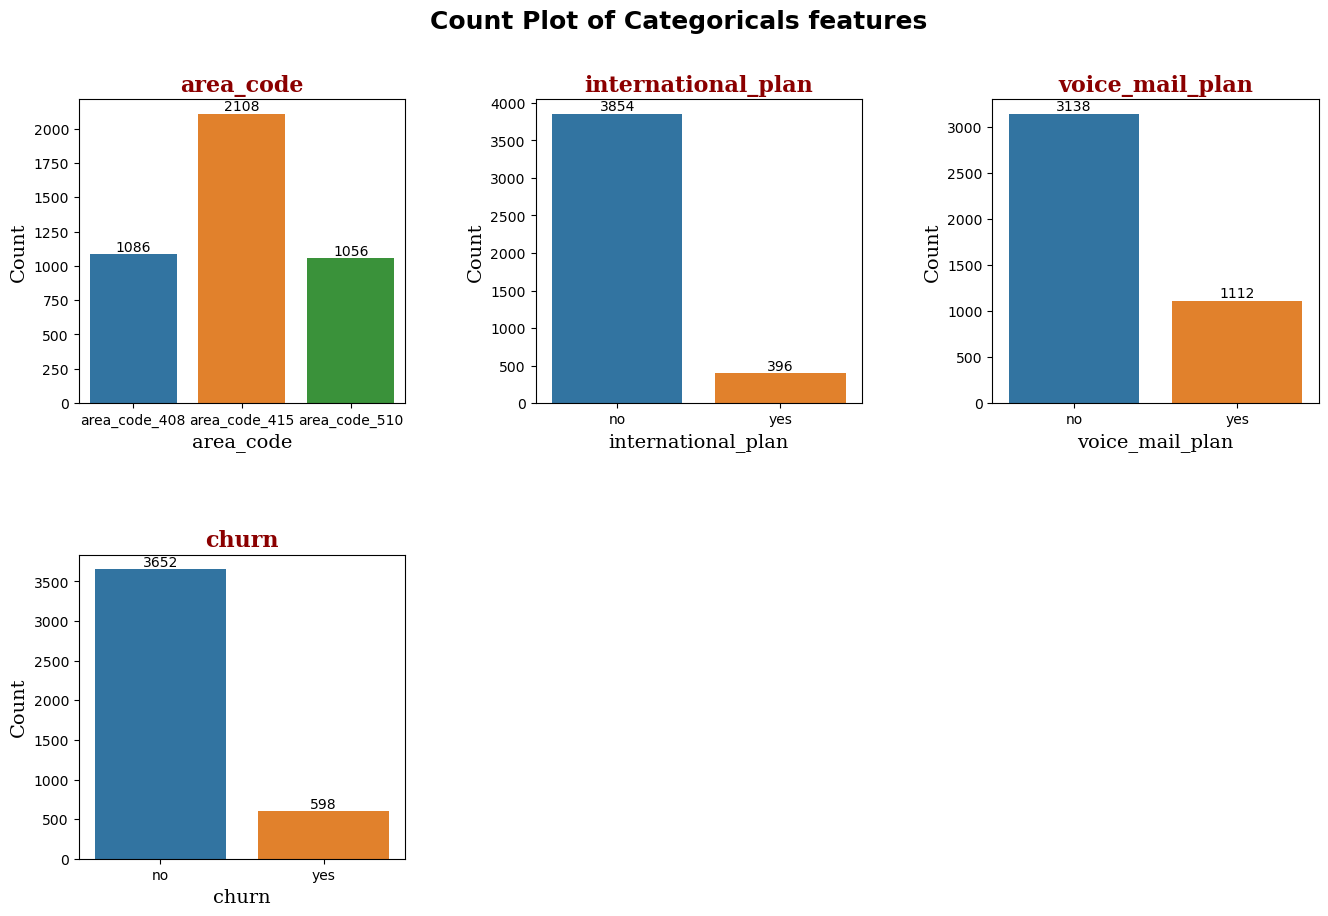

In [5]:
get_barplot(train_dataset,categ_columns[1:])

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

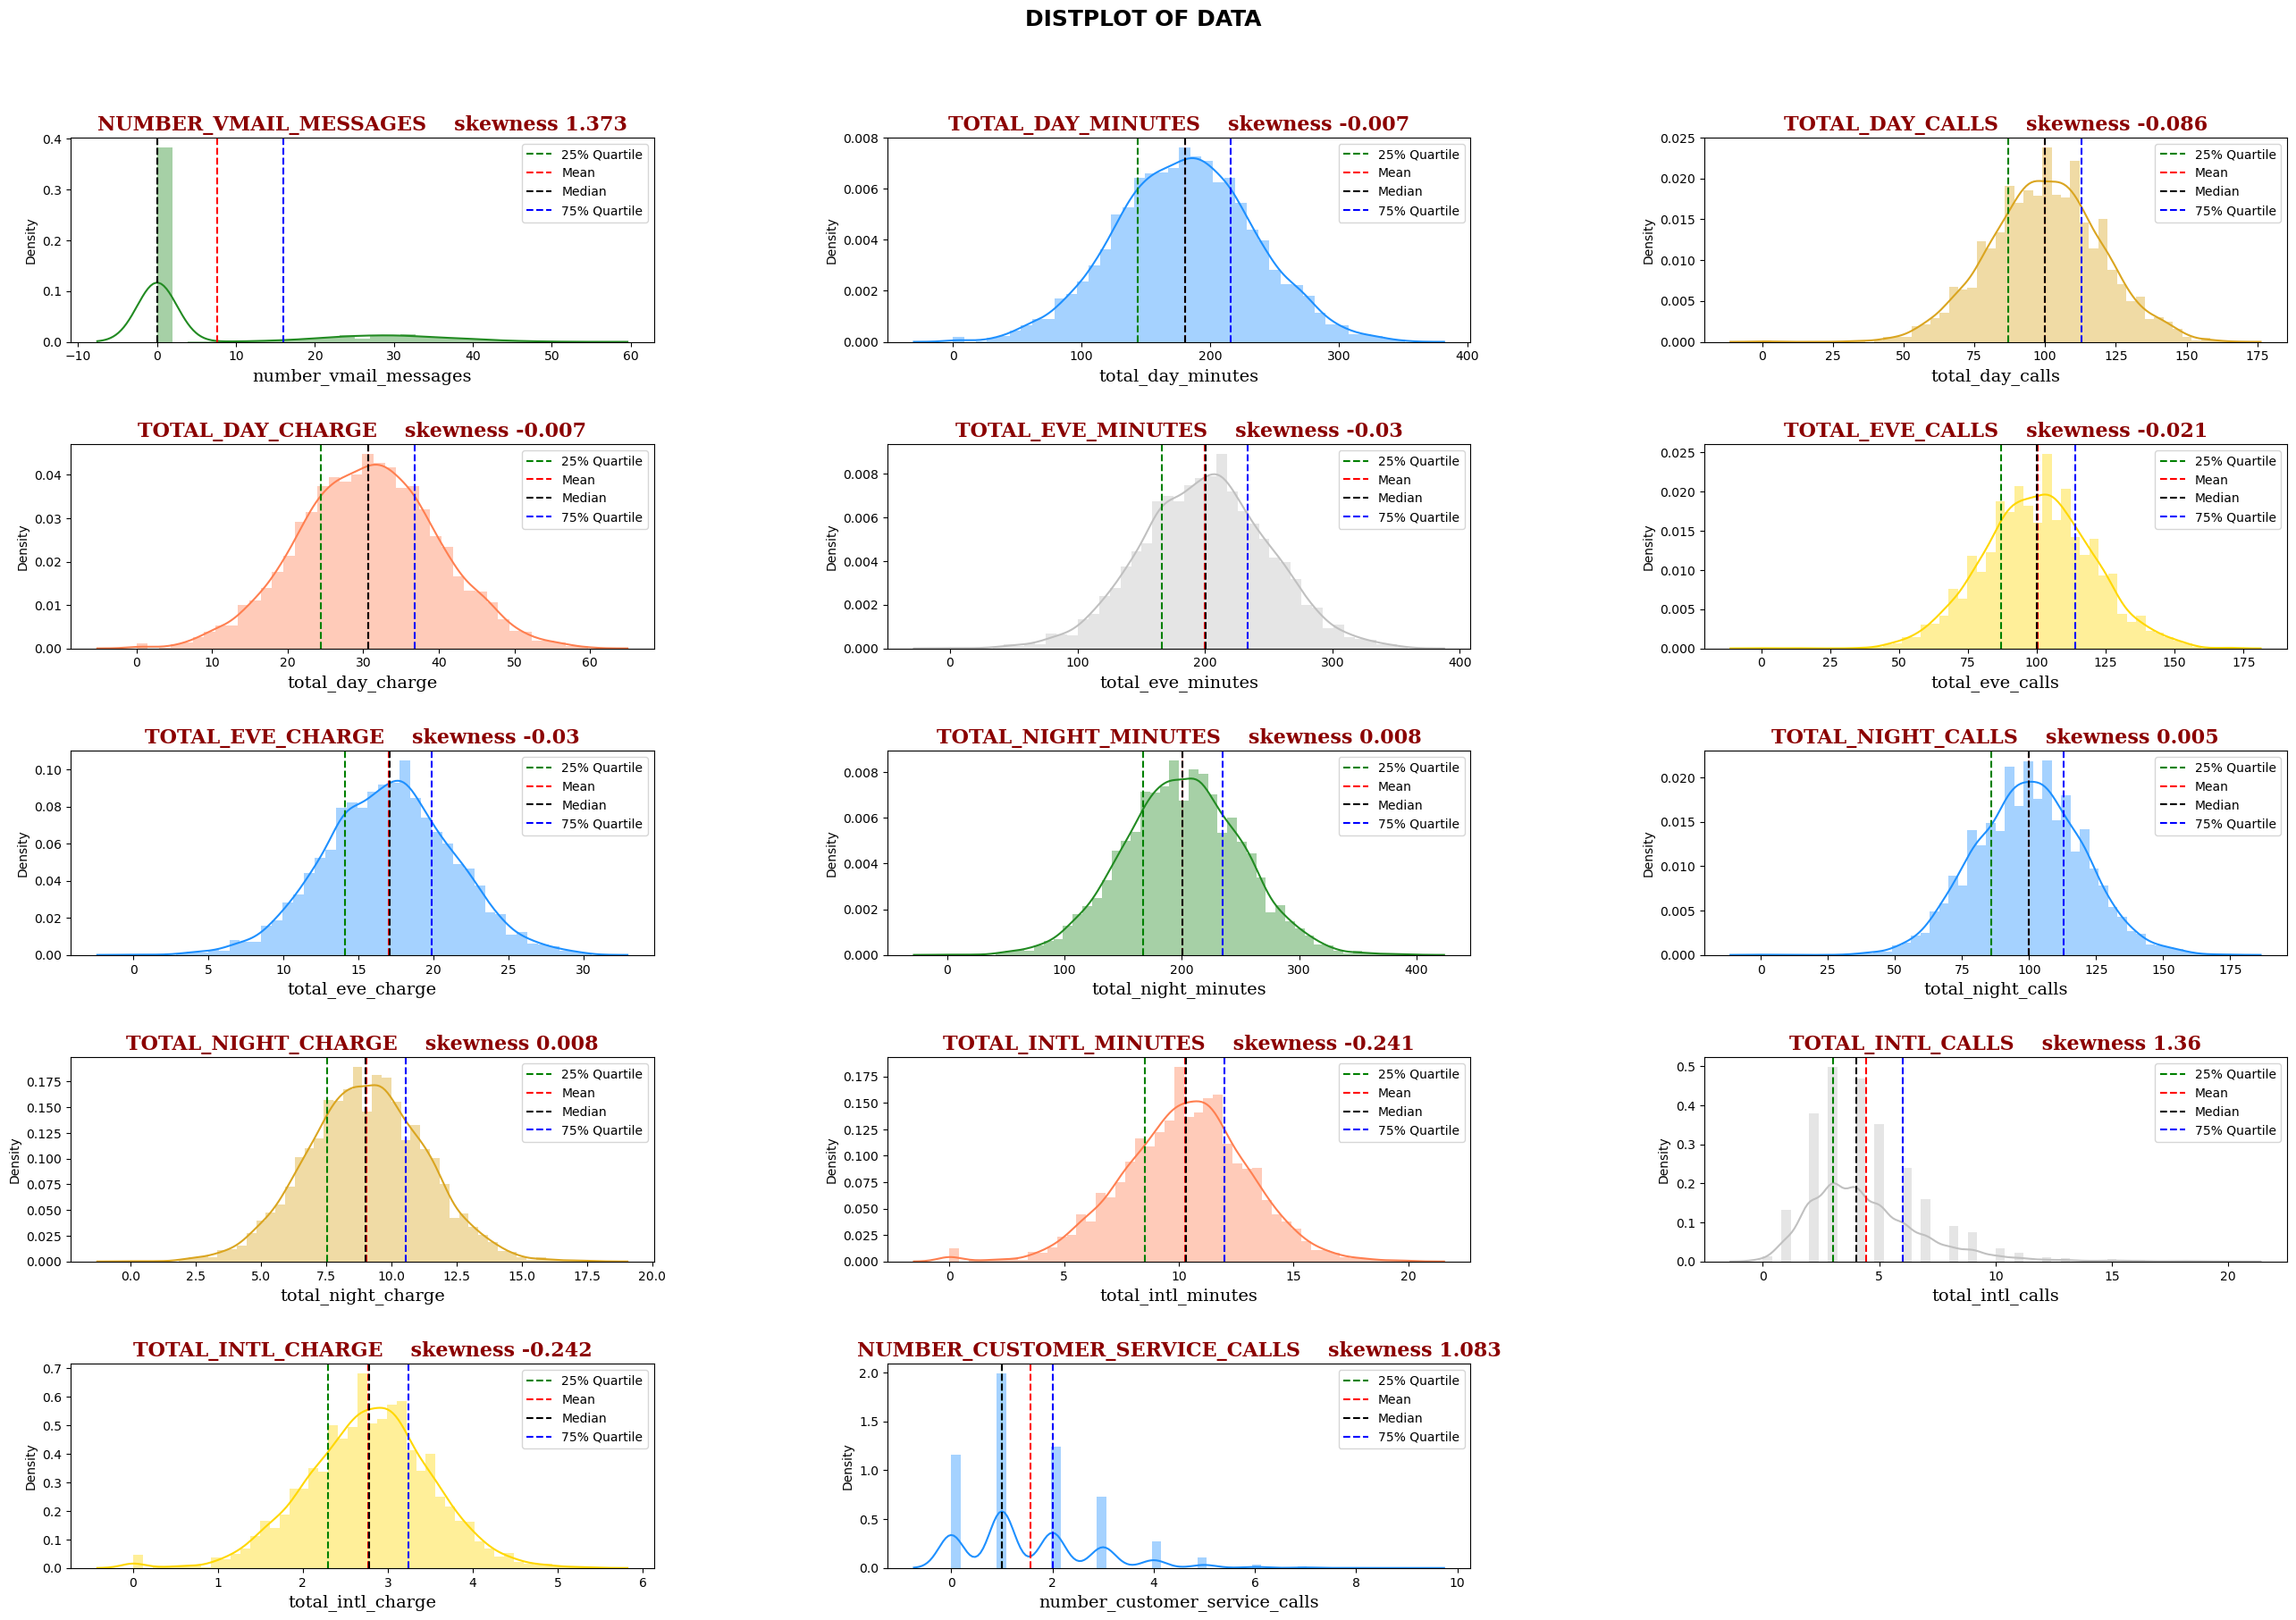

In [6]:
get_distribution(train_dataset,numerical_columns[1:])

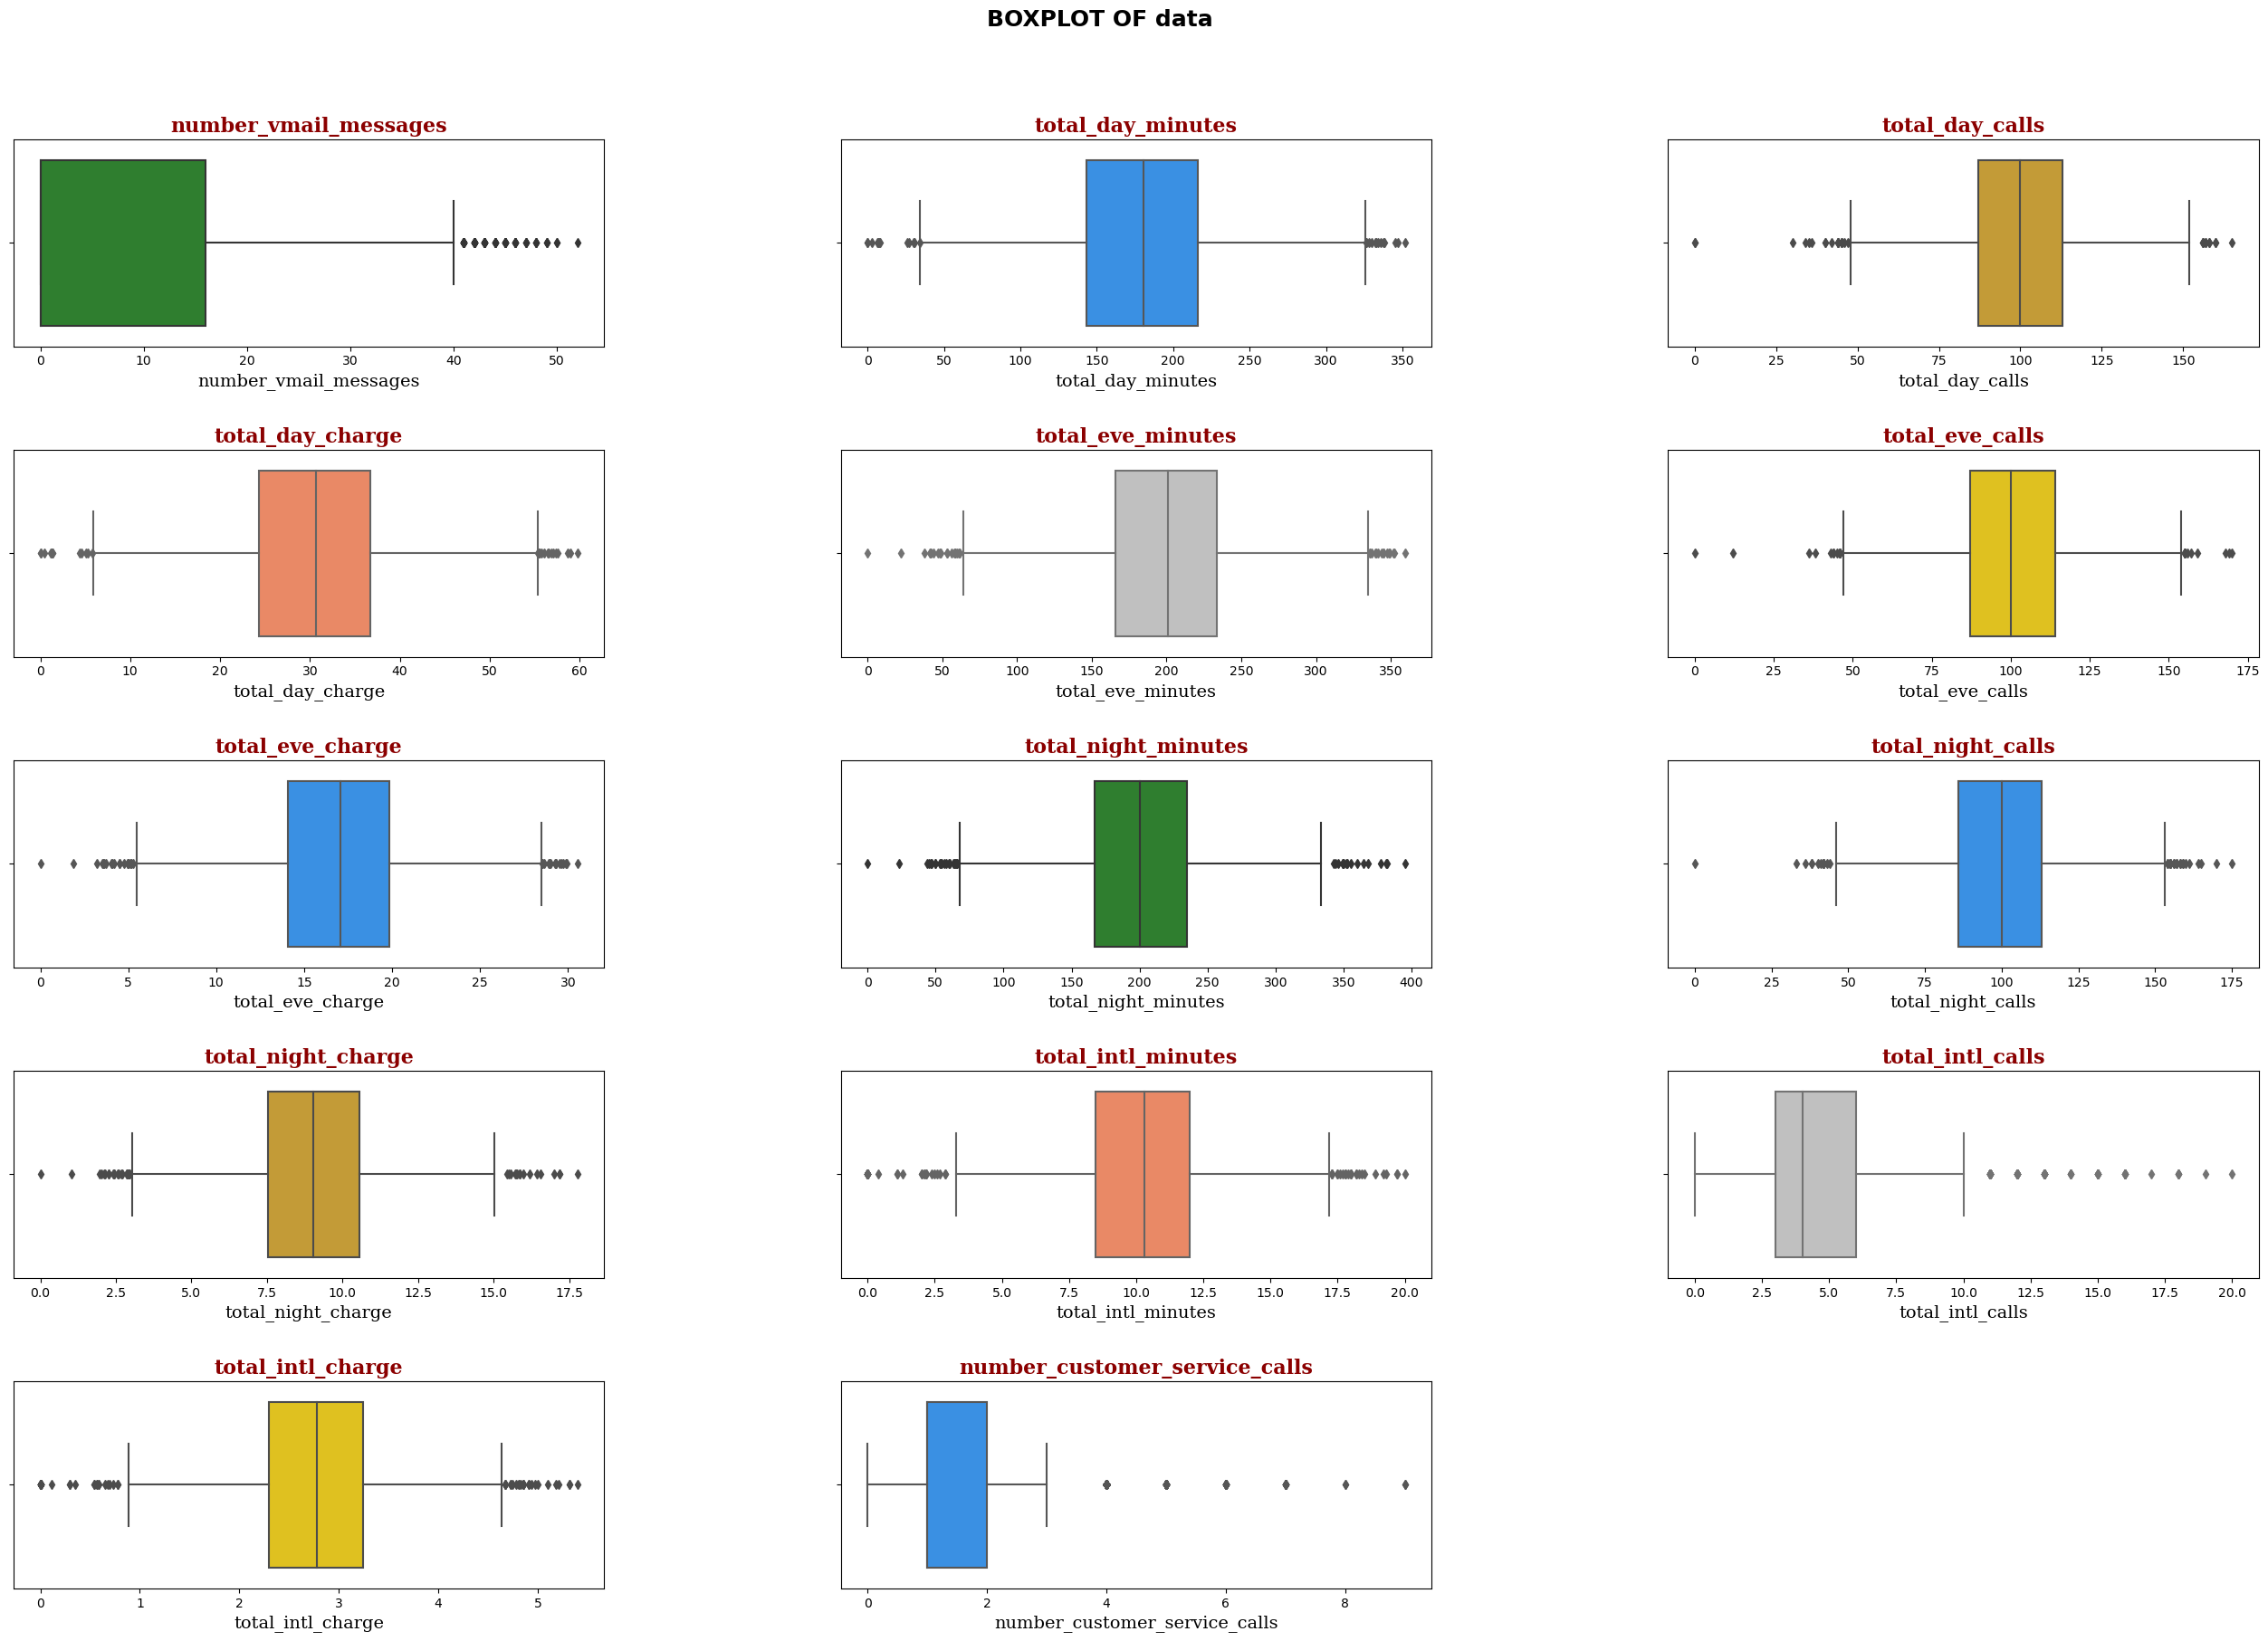

In [7]:
get_boxplot(train_dataset,numerical_columns[1:])

# outlier Detection using Interqualite Methods

In [8]:
field_mapping = outlier_detection_IQR(train_dataset,numerical_columns,sigma=3)

account_length has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

number_vmail_messages has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

total_day_minutes has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

total_day_calls has total number of outlier:2
above upper_thresh:0
below lower_thresh:2

total_day_charge has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

total_eve_minutes has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

total_eve_calls has total number of outlier:1
above upper_thresh:0
below lower_thresh:1

total_eve_charge has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

total_night_minutes has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

total_night_calls has total number of outlier:1
above upper_thresh:0
below lower_thresh:1

total_night_charge has total number of outlier:0
above upper_thresh:0
below lower_thresh:0

t

In [9]:
updated_train_set= remove_outliers(train_dataset,numerical_columns,field_mapping)

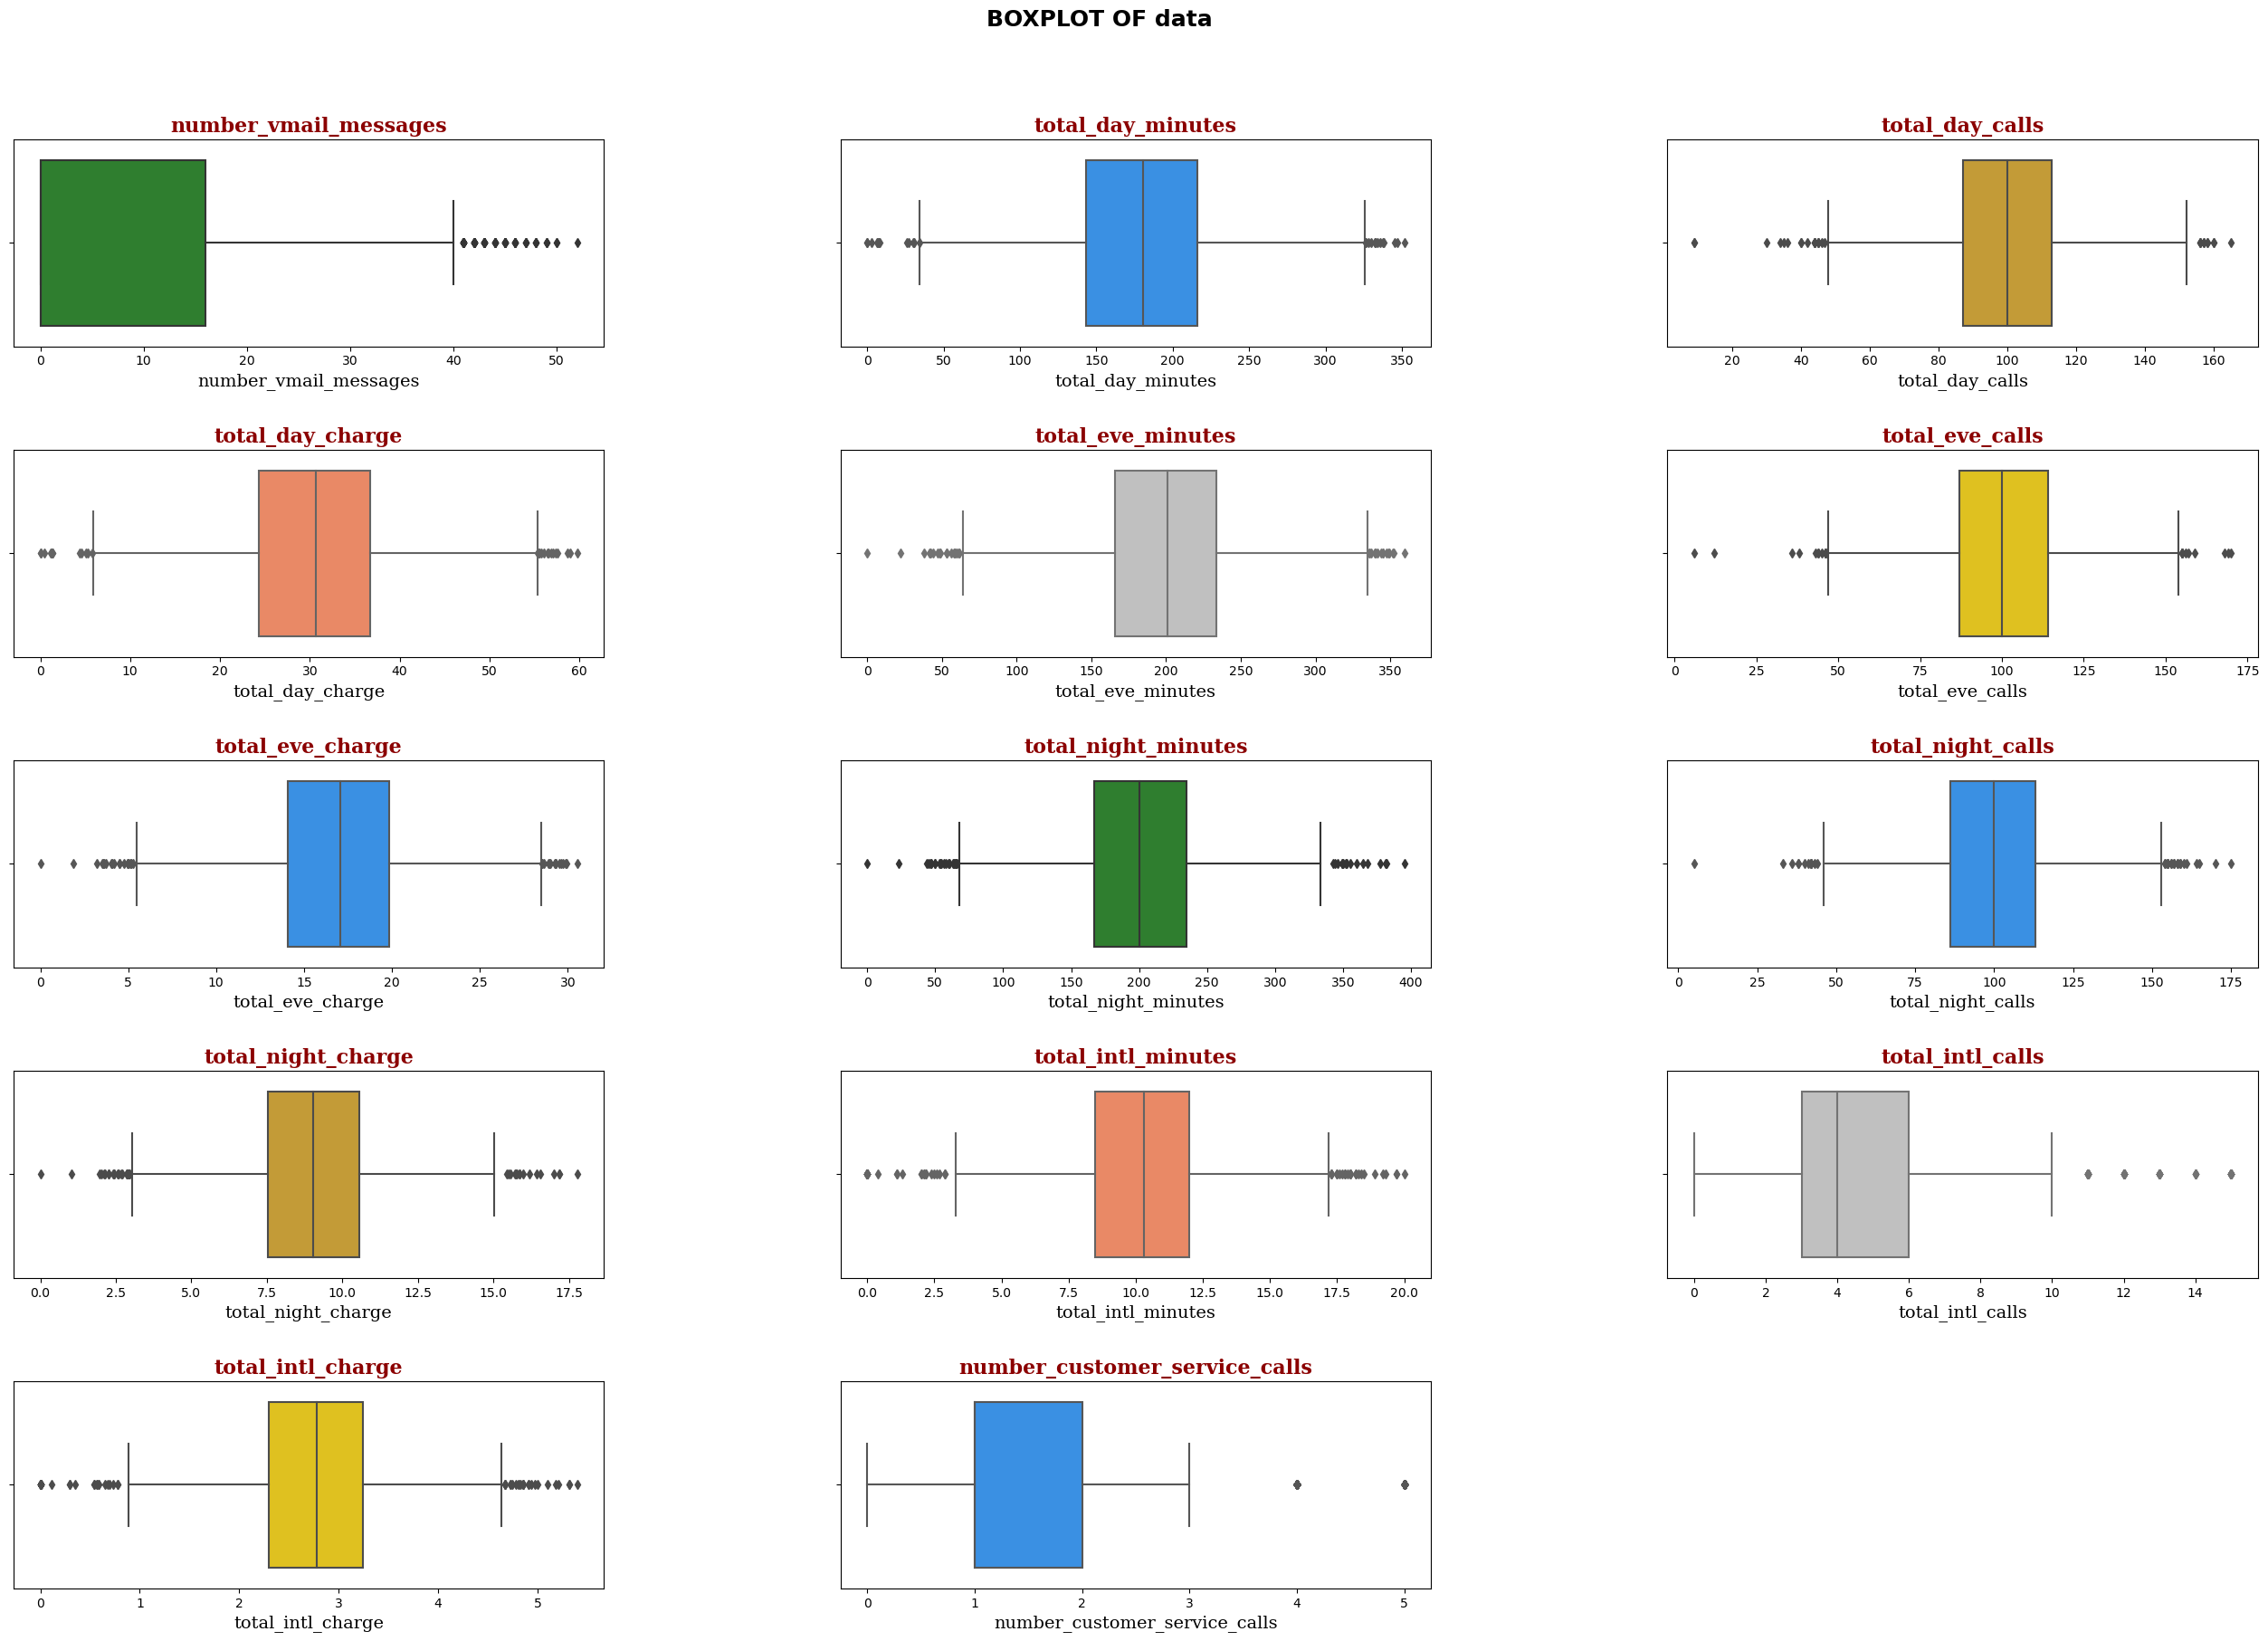

In [10]:
get_boxplot(updated_train_set,numerical_columns[1:])

In [11]:
#updated_train_set.drop(columns=['state','account_length','area_code'],inplace=True)

In [12]:
def get_updated_feature(dataset):
    #Feature Engineering
    dataset['international_plan'] = dataset['international_plan'].map({"no":0,"yes":1})
    dataset['voice_mail_plan']    = dataset['voice_mail_plan'].map({"no":0,"yes":1})
    dataset['area_code']          = dataset['area_code'].map({"area_code_415":0,"area_code_408":1,"area_code_510":2})
    
    state_map=dict()
    counter = 0
    for i in np.unique(dataset['state']):
        state_map[i]=counter
        counter+=1
        
    dataset['state'] = dataset['state'].map(state_map)    
    
    dataset['total_net_minutes']  = dataset['total_day_minutes'] + dataset['total_eve_minutes'] + dataset['total_night_minutes']
    dataset['total_net_calls']    = dataset['total_day_calls'] + dataset['total_eve_calls'] + dataset['total_night_calls']
    dataset['total_net_charge']   = dataset['total_day_charge'] + dataset['total_eve_charge'] + dataset['total_night_charge']
    
#     features = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_day_calls','total_eve_calls','total_night_calls',
#                 'total_day_charge','total_eve_charge','total_night_charge']
#     dataset.drop(columns=features,inplace=True)
    
    return dataset

In [13]:
trainset = get_updated_feature(dataset=updated_train_set)

In [14]:
trainset.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'total_net_minutes',
       'total_net_calls', 'total_net_charge'],
      dtype='object')

In [15]:
trainset.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'total_net_minutes',
       'total_net_calls', 'total_net_charge'],
      dtype='object')

In [16]:
features = ['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls','total_net_minutes',
       'total_net_calls', 'total_net_charge','churn']

In [17]:
trainset = trainset[features]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaled = MinMaxScaler()
Xtrain  = scaled.fit_transform(trainset.iloc[:,:-1])
ytrain  = trainset.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(Xtrain,ytrain,test_size=0.25,random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [23]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

In [25]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2745
         yes       1.00      1.00      1.00       442

    accuracy                           1.00      3187
   macro avg       1.00      1.00      1.00      3187
weighted avg       1.00      1.00      1.00      3187



In [26]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          no       0.97      0.99      0.98       907
         yes       0.96      0.83      0.89       156

    accuracy                           0.97      1063
   macro avg       0.97      0.91      0.94      1063
weighted avg       0.97      0.97      0.97      1063



In [27]:
test_dataset= pd.read_csv(r"D:\customer-churn-prediction-2020\test.csv")

In [28]:
test_dataset.index = test_dataset.id

In [29]:
#test_dataset.drop(columns=['id','state','account_length','area_code'],inplace=True)

In [30]:
#test_dataset.columns

In [31]:
validation_data = get_updated_feature(dataset=test_dataset)
validation_data = validation_data[features[:-1]]

In [32]:
scaled1 = MinMaxScaler()
scaled_data = scaled1.fit_transform(validation_data)

In [33]:
y_pred_validation = rfr.predict(scaled_data)

In [34]:
len(y_pred_validation)

750

In [35]:
test_dataset_v2 = pd.DataFrame({'id':test_dataset.index,'churn':y_pred_validation})
test_dataset_v2.to_csv(r"D:\customer-churn-prediction-2020\sampleSubmission4.csv",index=False)